In [ ]:
from google.colab import drive
import pandas as pd

#
drive.mount('/content/drive')

#
file_path = '/content/drive/My Drive/MA/Merged_Dataframe.csv'
data = pd.read_csv(file_path)

#
data.head()

Mounted at /content/drive


,Unnamed: 0,Time,Day-ahead Price [EUR/MWh],Currency,BZN|DE-LU,Day-ahead Total Load Forecast [MW] - BZN|DE-LU,Actual Total Load [MW] - BZN|DE-LU,Area,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,0,21.05.2024 00:00 - 21.05.2024 00:15,89.80,EUR,NaN,42617,39576,BZN|DE-LU,4442,5985,...,2184,155,n/e,n/e,116,72,0,302,3876,12155
1,1,21.05.2024 00:15 - 21.05.2024 00:30,82.50,EUR,NaN,42148,39285,BZN|DE-LU,4427,5894,...,2182,112,n/e,n/e,116,72,0,306,4028,12299
2,2,21.05.2024 00:30 - 21.05.2024 00:45,67.63,EUR,NaN,42067,39174,BZN|DE-LU,4412,5826,...,2183,186,n/e,n/e,115,72,0,302,4229,12320
3,3,21.05.2024 00:45 - 21.05.2024 01:00,57.70,EUR,NaN,41562,38464,BZN|DE-LU,4411,5772,...,2188,126,n/e,n/e,115,72,0,304,4300,12203
4,4,21.05.2024 01:00 - 21.05.2024 01:15,85.16,EUR,NaN,40970,37278,BZN|DE-LU,4390,5703,...,2191,151,n/e,n/e,115,72,0,302,4475,12377


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#
data_cleaned = data.replace("n/e", np.nan)

#
data_cleaned = data_cleaned.dropna(axis=1, how='all')

#
data_cleaned = data_cleaned.fillna(data_cleaned.mean(numeric_only=True))

#
data_cleaned = data_cleaned.drop(columns=["Unnamed: 0", "Currency", "Time", "Area"])

#
features = data_cleaned.drop(columns=["Day-ahead Price [EUR/MWh]"])
target = data_cleaned["Day-ahead Price [EUR/MWh]"]

#
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#
model = LinearRegression()
model.fit(X_train, y_train)

#
y_pred = model.predict(X_test)

#
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 301.3466633005546
R-squared: 0.6777676513458317


Mean Squared Error: 301.3466633005546
R-squared: 0.6777676513458317


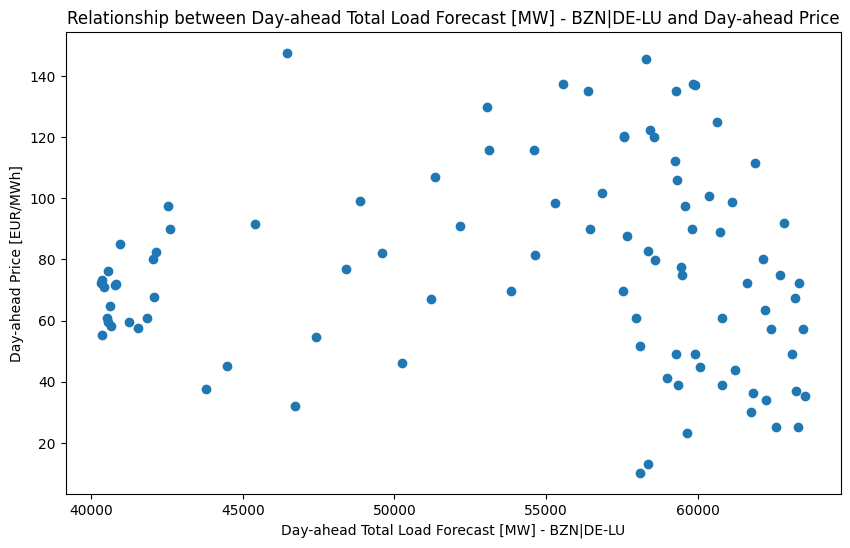

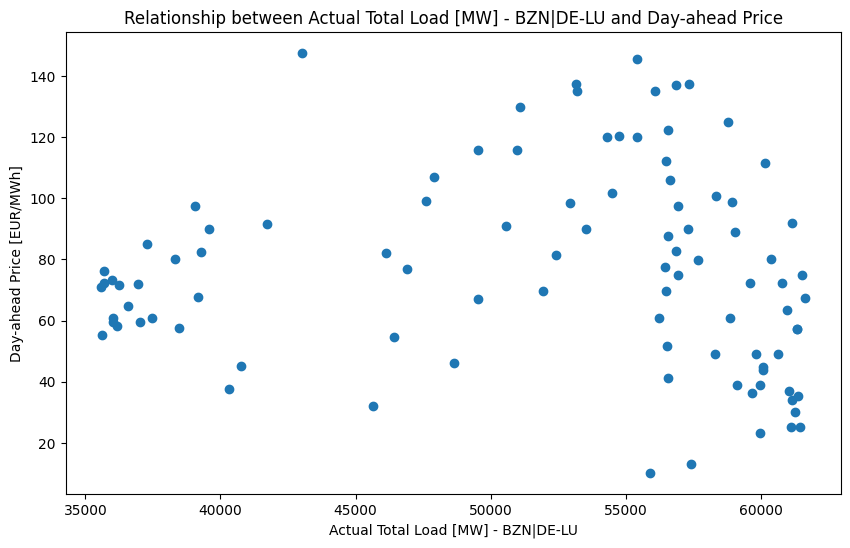

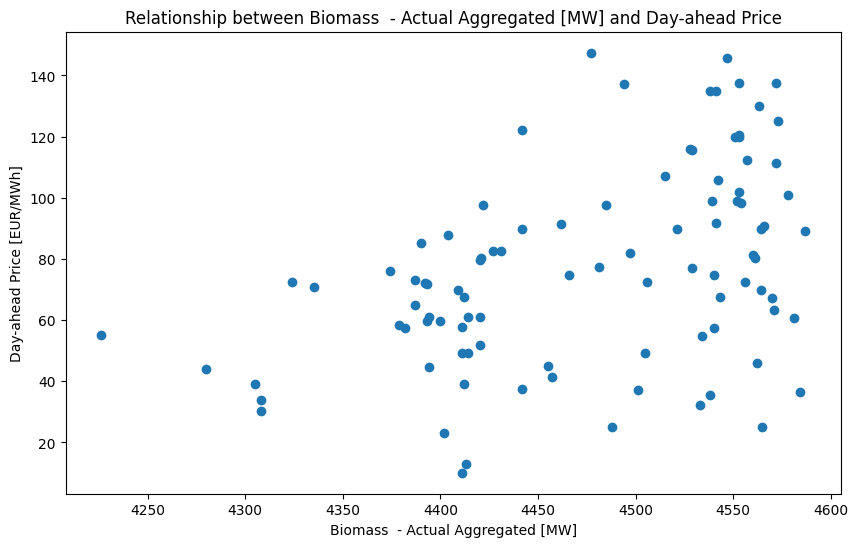

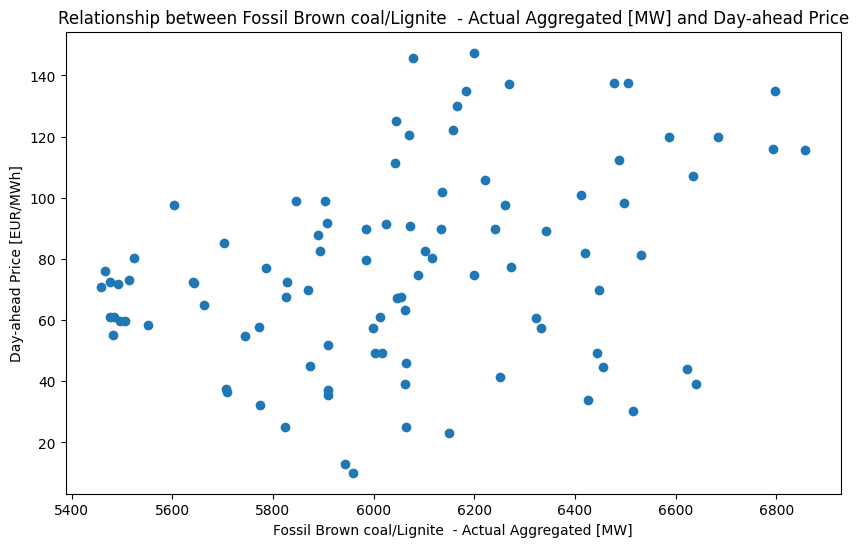

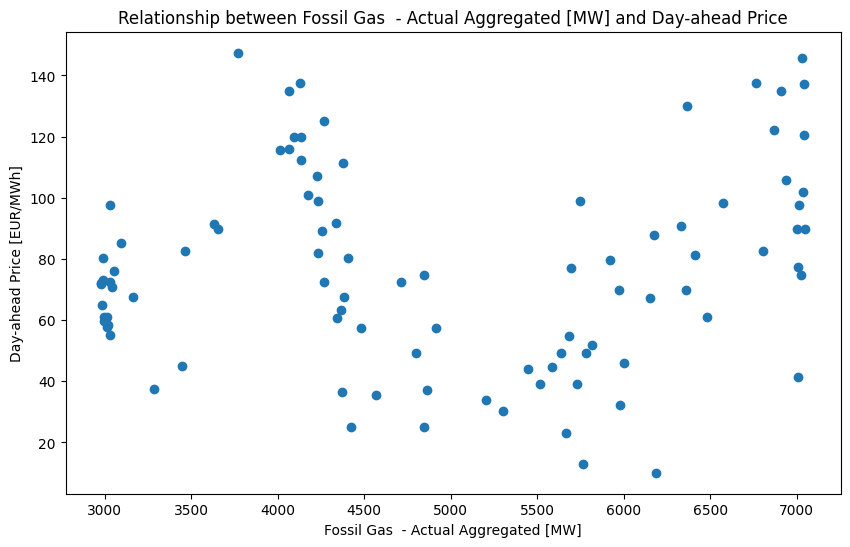

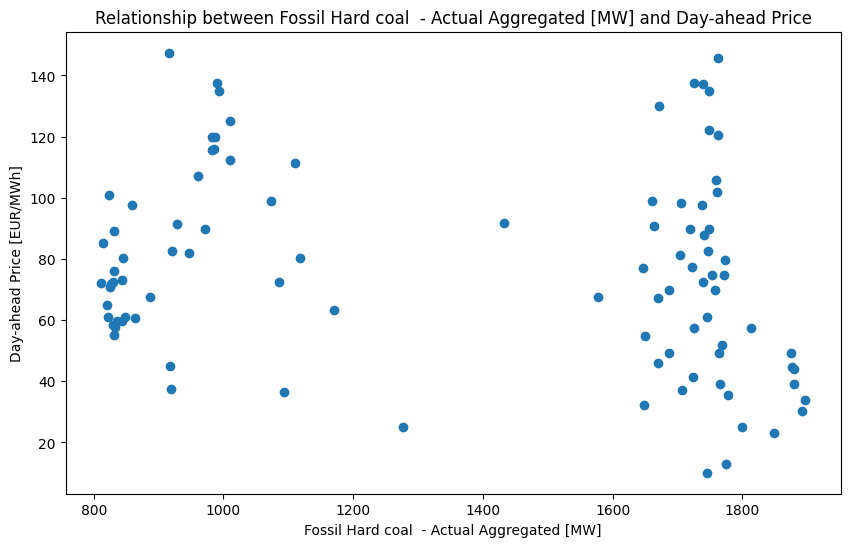

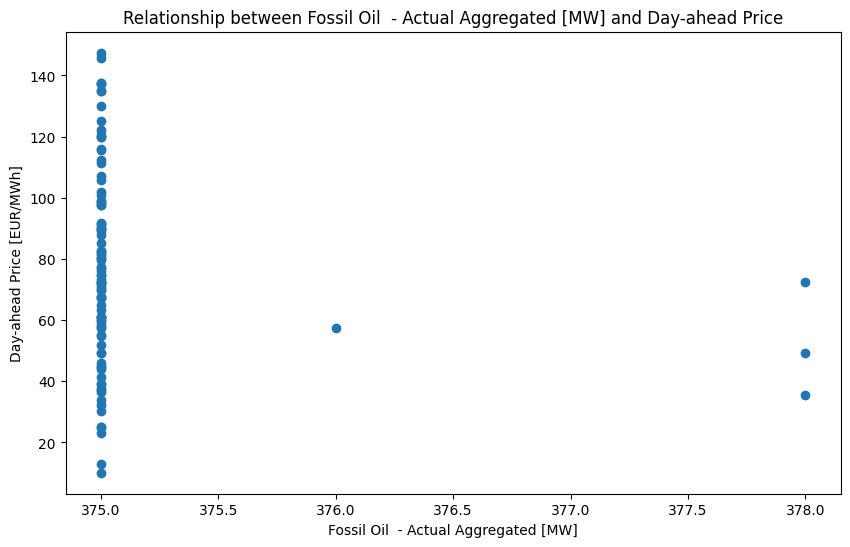

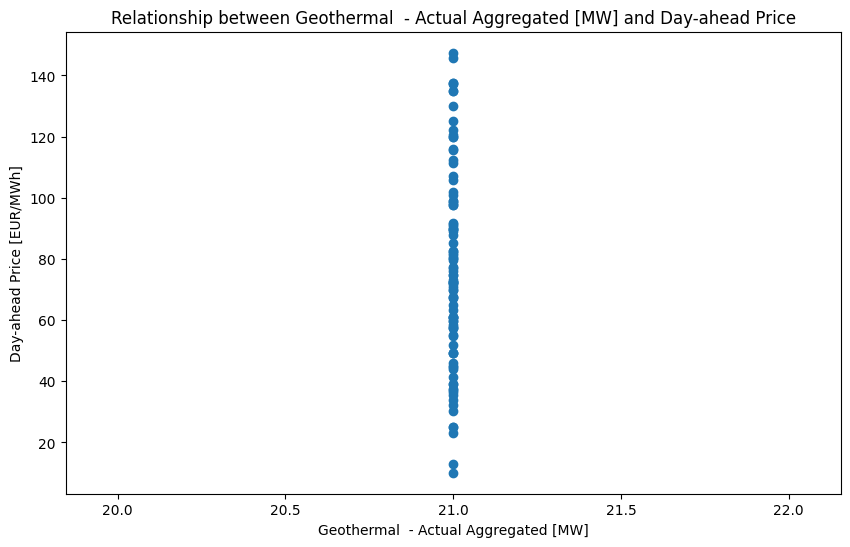

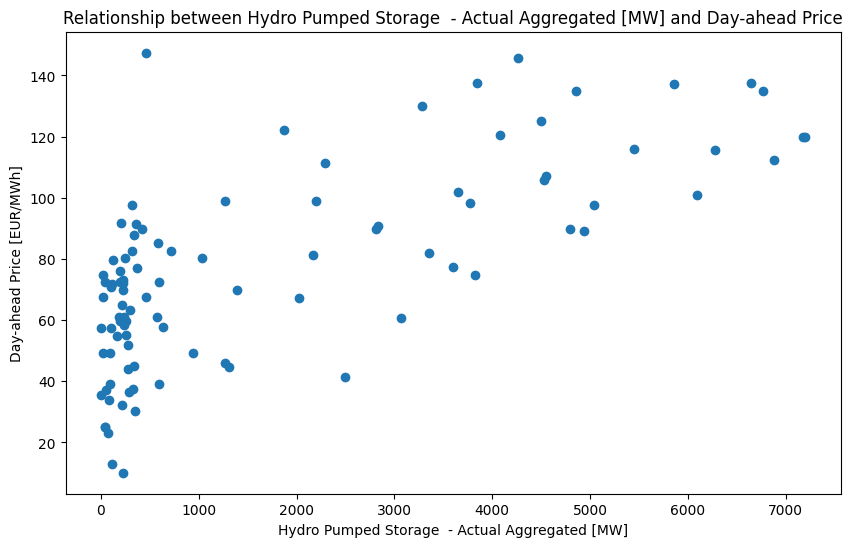

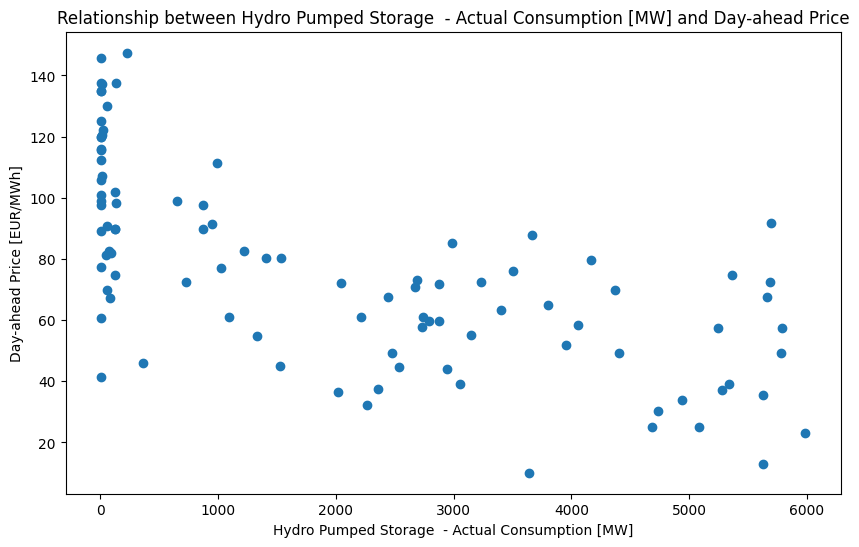

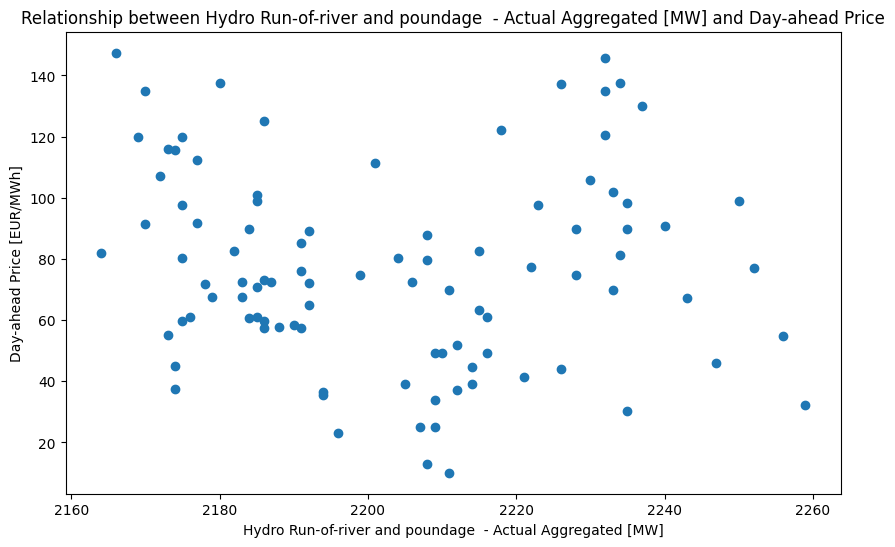

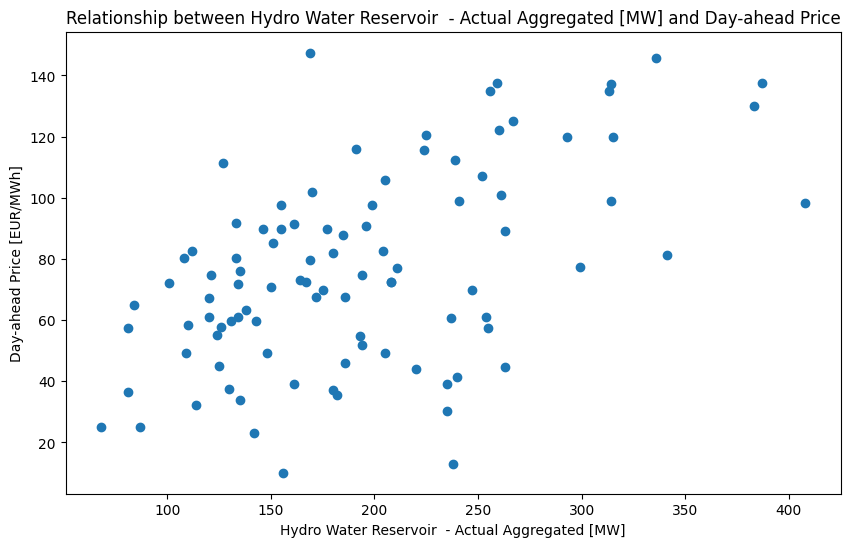

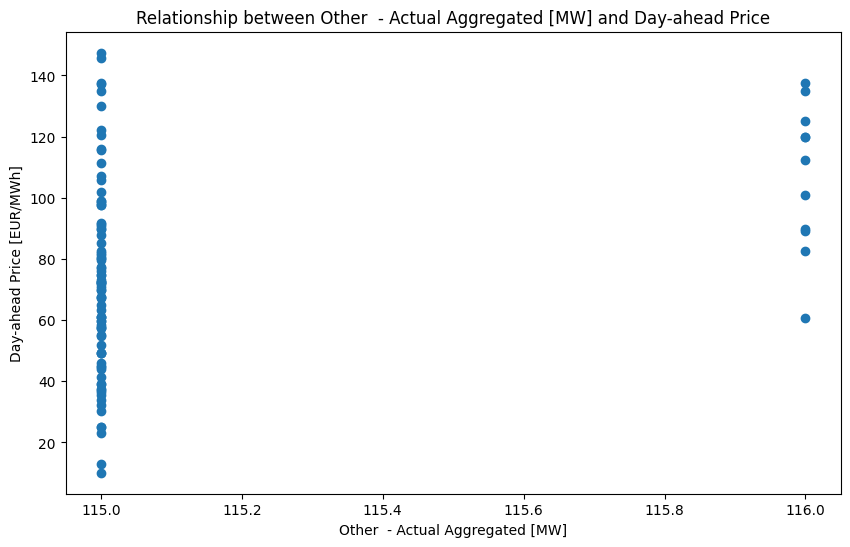

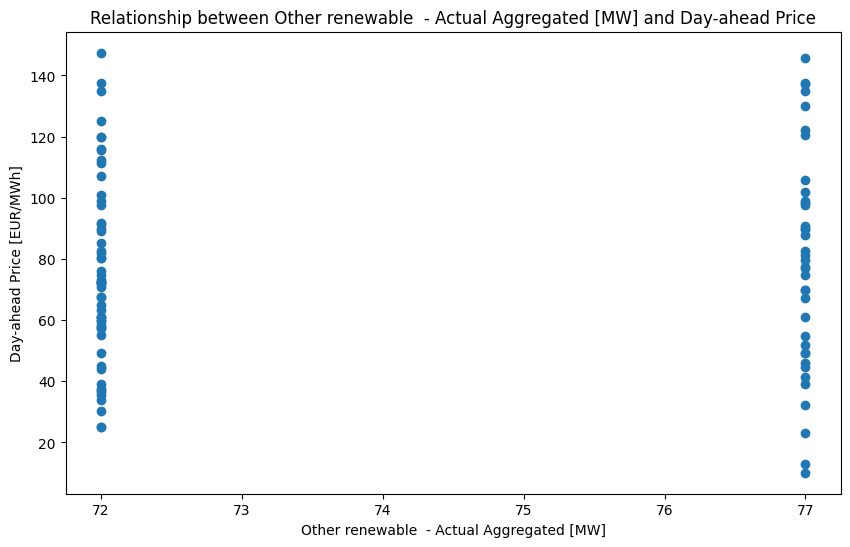

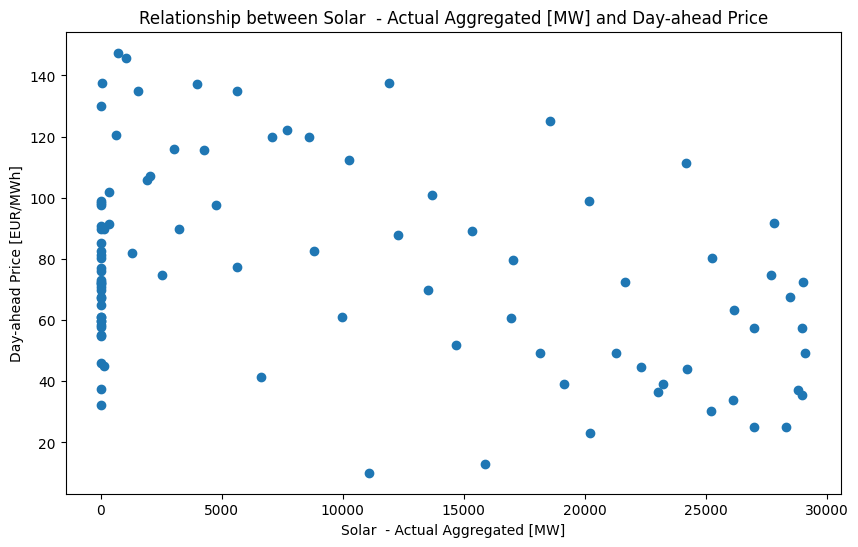

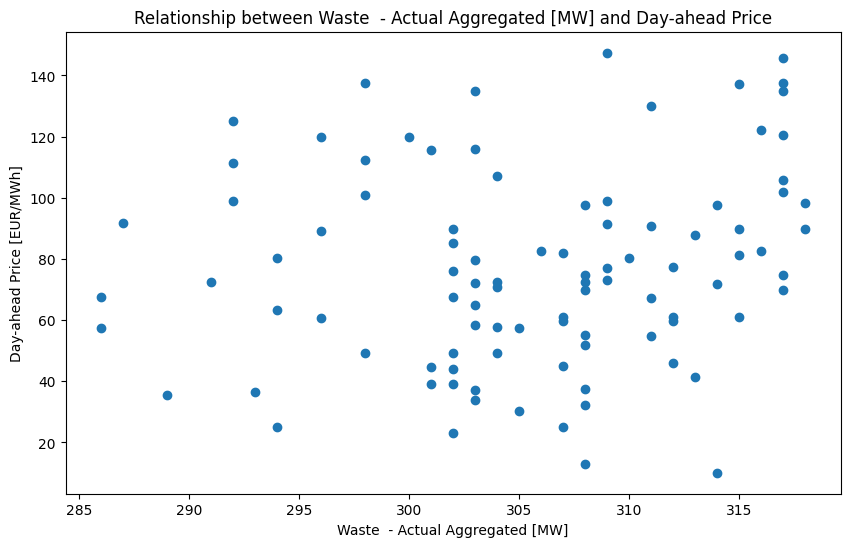

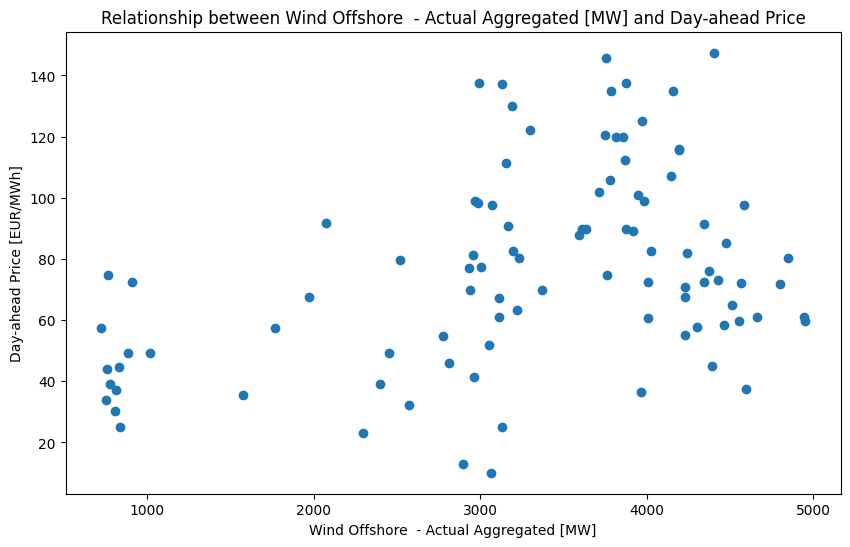

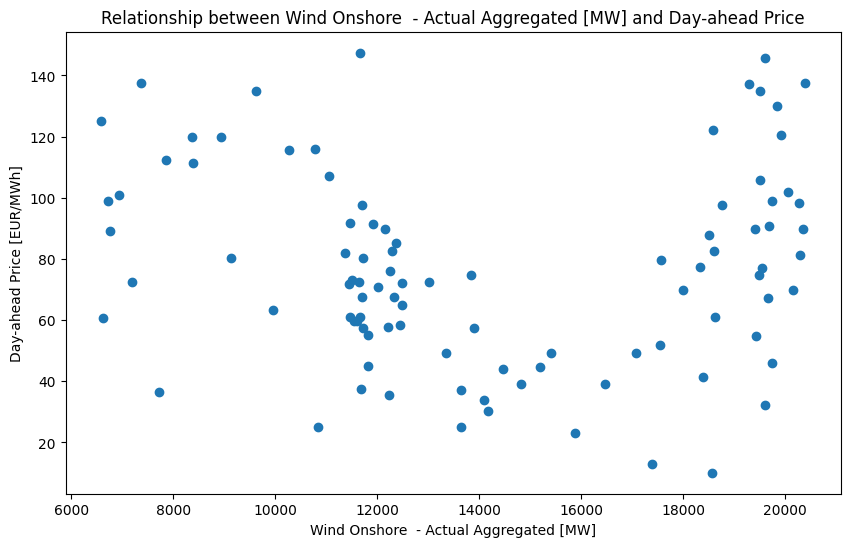

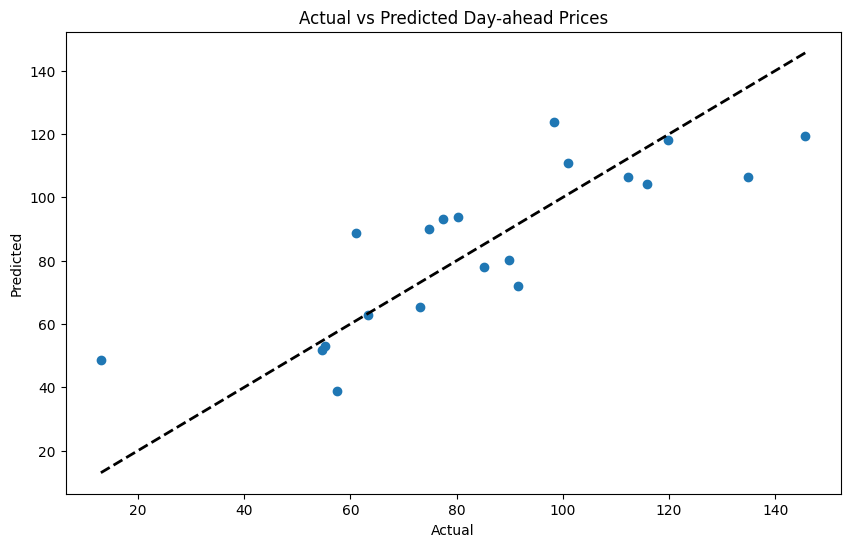

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


#
data_cleaned = data.replace("n/e", np.nan)

#
data_cleaned = data_cleaned.dropna(axis=1, how='all')

#
data_cleaned = data_cleaned.fillna(data_cleaned.mean(numeric_only=True))

#
data_cleaned = data_cleaned.drop(columns=["Unnamed: 0", "Currency", "Time", "Area"])

#
features = data_cleaned.drop(columns=["Day-ahead Price [EUR/MWh]"])
target = data_cleaned["Day-ahead Price [EUR/MWh]"]

#
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#
model = LinearRegression()
model.fit(X_train, y_train)

#
y_pred = model.predict(X_test)

#
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#
for column in features.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(data_cleaned[column], target)
    plt.xlabel(column)
    plt.ylabel("Day-ahead Price [EUR/MWh]")
    plt.title(f'Relationship between {column} and Day-ahead Price')
    plt.show()

#
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Day-ahead Prices')
plt.show()
